In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
import pickle
import os
import time
import datetime
from matplotlib import patches
import multi_tracker_analysis as mta
import scipy.stats
import figurefirst as fifi
import pandas
import copy
import flystat
import fly_plot_lib.plot as fpl
import matplotlib.patches as mpatches

/home/caveman/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


1.5.1
recommended version: 1.1.1 or greater


In [2]:
from numpy import random, histogram2d, diff
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/caveman/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
fififig = 'figures/foraging_fig_1.svg'

In [5]:
import load_data
log_df = load_data.load_data()

load_data.py:70: RuntimeWarning: divide by zero encountered in log
  log_df['log_' + col] = np.log(df[col])
load_data.py:70: RuntimeWarning: invalid value encountered in log
  log_df['log_' + col] = np.log(df[col])


In [9]:
for _, flid in enumerate(log_df.flid.unique()):
    dfq = log_df[log_df.flid==flid]
    print(str(flid) + ': n trajecs where approached odor: ' + str(len(dfq[dfq.approached_odor==1]) ) )

0: n trajecs where approached odor: 17
1: n trajecs where approached odor: 5
2: n trajecs where approached odor: 15
3: n trajecs where approached odor: 15
4: n trajecs where approached odor: 2
5: n trajecs where approached odor: 5
6: n trajecs where approached odor: 3
7: n trajecs where approached odor: 4
8: n trajecs where approached odor: 10
9: n trajecs where approached odor: 3
10: n trajecs where approached odor: 1
12: n trajecs where approached odor: 17
14: n trajecs where approached odor: 3
16: n trajecs where approached odor: 3
17: n trajecs where approached odor: 8
19: n trajecs where approached odor: 8


In [6]:
def plot_flid_data(ax, df, flid, n):
    dfq = df[df.flid==flid]
    try:
        fpl.scatter_box(ax, n+0.2, dfq[dfq.approached_odor==1].iloc[1:].distance_travelled.values, 
                        color='black', xwidth=0.3, markersize=2)
    except:
        pass
    ax.plot(n, dfq[dfq.approached_odor==1].iloc[0].distance_travelled, 'o', color='red', markersize=3)
    #ax.plot(n, dfq[dfq.approached_odor==1].iloc[0].distance_travelled, 'o', color='red', markersize=3)
    try:
        fpl.scatter_box(ax, n+1-0.2, dfq[dfq.approached_odor==-1].distance_travelled.values, 
                        color='lightgray', edgecolor='black', xwidth=0.3, markersize=2, marker_linewidth=0.25, 
                        scatter_color='white')
    except:
        pass

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


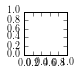

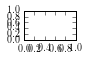

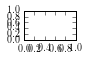

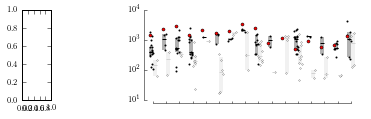

In [7]:
fififig = '/home/caveman/Sync/LAB_Private/PAPERS/2020_foraging/foraging_fig_1.svg'
layout = fifi.svg_to_axes.FigureLayout(fififig, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])
ax = layout.axes[('first', 'individual')]

n = 0
for _, flid in enumerate(log_df.flid.unique()):
    
    plot_flid_data(ax, log_df, flid, n)
    n += 2

ax.set_yscale('log')
yticks = [10**1, 10**2, 10**3, 10**4]
yticklabels = ['$10^1$', '$10^2$', '$10^3$', '$10^4$']
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks=yticks, 
                                 xticks = np.arange(0, len(log_df.flid.unique())*2, 2)+0.5,
                                 linewidth=0.5, tick_length=2.5, 
                                 spine_locations={'left': 2.5, 'bottom': 2.5})
ax.set_xlim(-0.5, len(log_df.flid.unique())*2+0.5)
ax.set_ylim(10, 10**4)
ax.set_yticklabels(yticklabels)
ax.set_xticklabels([])
ax.minorticks_off()

#######

fifi.mpl_functions.set_fontsize(ax.figure, 8)
layout.append_figure_to_layer(layout.figures['first'], 'first', cleartarget=True)
layout.write_svg(fififig)